#### Carlos Hernandez
#### Capstone Idea

I plan to use data provided by the NYC open data to identify and predict areas where crime occurs and to gain insight on crime in different areas of NYC. Below I proved a very basic overview of the data which I plan to continue to expand. Below I focus solely on crime in NYC in 2021 so far but can use historical data from 2013 as well.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data.csv")

In [4]:
####OVERVIEW OF DATA
data.head()

,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,VIC_SEX,borough_x,year,date_y,borough_y,crimes,time_borough,location_yr,pop,crime_rate
0,0,216044876,2017-01-01,11:00:00,08/20/2018,109.0,12/31/2019,116,SEX CRIMES,179.0,...,F,queens,2017,201701,queens,7617,201701queens,2017queens,2358582,322.95
1,1,669902330,2017-01-01,00:01:00,12/31/2017,114.0,11/26/2019,233,SEX CRIMES,175.0,...,F,queens,2017,201701,queens,7617,201701queens,2017queens,2358582,322.95
2,2,336910010,2017-01-01,12:00:00,11/14/2019,104.0,11/14/2019,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,F,queens,2017,201701,queens,7617,201701queens,2017queens,2358582,322.95
3,3,452130663,2017-01-01,12:00:00,12/31/2017,113.0,11/21/2019,104,RAPE,155.0,...,F,queens,2017,201701,queens,7617,201701queens,2017queens,2358582,322.95
4,4,785888415,2017-01-01,09:00:00,08/09/2018,110.0,11/13/2019,233,SEX CRIMES,175.0,...,F,queens,2017,201701,queens,7617,201701queens,2017queens,2358582,322.95


In [5]:
data.columns

Index(['Unnamed: 0', 'CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM',
       'CMPLNT_TO_DT', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM', 'PREM_TYP_DESC',
       'JURIS_DESC', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'Latitude', 'Longitude',
       'Lat_Lon', 'PATROL_BORO', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX',
       'borough_x', 'year', 'date_y', 'borough_y', 'crimes', 'time_borough',
       'location_yr', 'pop', 'crime_rate'],
      dtype='object')

In [6]:
crime_count = pd.DataFrame(data['PD_DESC'].value_counts(dropna=True))

The data had around 230 different crimes, so plotted the 20 most prevalent crimes.

<AxesSubplot:title={'center':'20 Most Prevalent Crime in NYC 2021 so far'}>

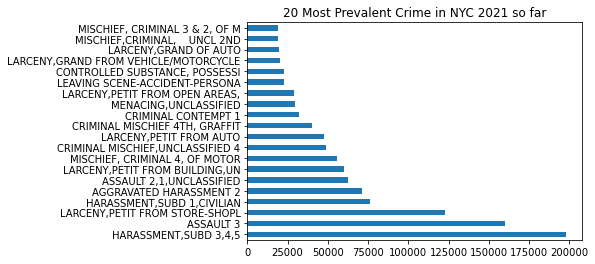

In [7]:

crime_count.head(n=20).plot.barh(title='20 Most Prevalent Crime in NYC 2021 so far', legend=False)

In [17]:
vol = ['522,639', '448,296', '162,995', '156,850', '45,528', '14,710']
data['SUSP_AGE_GROUP'].value_counts(dropna=True)[0:6]

UNKNOWN    522639
25-44      448296
45-64      162995
18-24      156850
<18         45528
65+         14710
Name: SUSP_AGE_GROUP, dtype: int64

In [20]:
age_groups = pd.DataFrame(data['SUSP_AGE_GROUP'].value_counts(dropna=True)[0:6])
age_groups = age_groups.reset_index()
age_groups['Age Group'] = age_groups['index']
age_groups['Number of Suspects'] = vol
age_groups = age_groups.drop(['SUSP_AGE_GROUP', 'index'], axis=1)
age_groups.head(6)

,Age Group,Number of Suspects
0,UNKNOWN,"522,639"
1,25-44,"448,296"
2,45-64,"162,995"
3,18-24,"156,850"
4,<18,"45,528"
5,65+,"14,710"


Below we see the percentage of the different age groups. As expected, the most people aged 25-44 accounted for over half of the crimes.

In [16]:
#age_groups.plot.pie(y='VIC_AGE_GROUP', title='Pie Chart showing Age Groups' , \
               #    autopct='%1.1f%%')

In [17]:
perp_sex = pd.DataFrame(data['SUSP_SEX'].value_counts(dropna=True))
perp_sex.head()

,SUSP_SEX
M,818016
U,289175
F,243940


Also as expected, males were generally the perpetrators.

<AxesSubplot:title={'center':'Suspect Sex Pie Chart'}, ylabel='SUSP_SEX'>

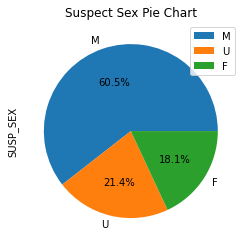

In [38]:
perp_sex.plot.pie(y='SUSP_SEX', title='Suspect Sex Pie Chart', \
                   autopct='%1.1f%%')

In [23]:
types = pd.DataFrame(data['LAW_CAT_CD'].value_counts(dropna=True))
types.head()

,LAW_CAT_CD
MISDEMEANOR,961298
FELONY,553855
VIOLATION,276995


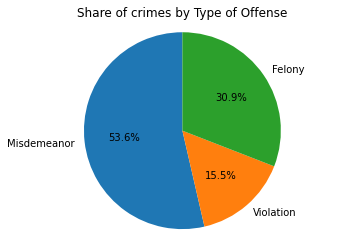

In [40]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Misdemeanor', 'Violation', 'Felony'
sizes = [53.6, 15.5, 30.9]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Share of crimes by Type of Offense')
plt.show()

In [10]:
borough = pd.DataFrame(data['ARREST_BORO'].value_counts(dropna=True))
borough

,ARREST_BORO
K,31004
M,28948
B,25312
Q,24654
S,5381


Below I show the frequency of crimes by borough. Staten Island appears to have far less crime on raw terms than the other boroughs, though they have a much smaller population than other boroughs.

<AxesSubplot:title={'center':'Frequency of Crimes by Borough 2021'}>

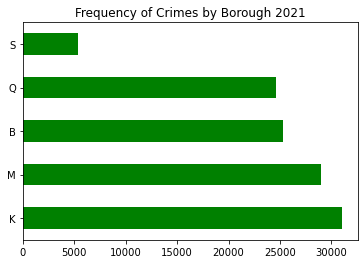

In [11]:
borough.plot.barh(y='ARREST_BORO', title='Frequency of Crimes by Borough 2021', legend = False, color = 'green')

### Introduce column with populations of each borough
https://data.cityofnewyork.us/City-Government/NYC-Population-by-Borough/h2bk-zmw6

In [12]:
borough_pop = pd.read_csv("NYC_Population_by_Borough.csv")
borough_pop

,Borough,Population
0,Queens,"4,460,101"
1,Brooklyn,"4,970,026"
2,Staten Island,"912,458"
3,Manhattan,"3,123,068"
4,Bronx,"2,717,758"


In [13]:
code = ['Q', 'K', 'S', 'M', 'B']
borough_pop['city_code'] = code

In [14]:
borough_pop

,Borough,Population,city_code
0,Queens,"4,460,101",Q
1,Brooklyn,"4,970,026",K
2,Staten Island,"912,458",S
3,Manhattan,"3,123,068",M
4,Bronx,"2,717,758",B


## Manhattan Race data

In [15]:
manrace = pd.read_csv("manhattan_race.csv")

In [16]:
manrace

,Label (Grouping),"Manhattan borough, New York County, New York!!Estimate","Manhattan borough, New York County, New York!!Margin of Error"
0,Total:,"1,628,706",*****
1,Not Hispanic or Latino:,"1,211,948",*****
2,White alone,"763,400","±1,961"
3,Black or African American alone,"199,823","±3,849"
4,American Indian and Alaska Native alone,"2,612",±749
5,Asian alone,"201,049","±3,294"
6,Native Hawaiian and Other Pacific Isla...,39,±69
7,Some other race alone,"7,373","±2,221"
8,Two or more races:,"37,652","±5,319"
9,Two races including Some other race,"2,227","±1,145"


In [17]:
manrace = manrace.rename(columns = {"Label (Grouping)":"race","Manhattan borough, New York County, New York!!Estimate" : "pop_est"})

In [18]:
manrace = manrace.drop('Manhattan borough, New York County, New York!!Margin of Error', axis=1)
manrace

,race,pop_est
0,Total:,"1,628,706"
1,Not Hispanic or Latino:,"1,211,948"
2,White alone,"763,400"
3,Black or African American alone,"199,823"
4,American Indian and Alaska Native alone,"2,612"
5,Asian alone,"201,049"
6,Native Hawaiian and Other Pacific Isla...,39
7,Some other race alone,"7,373"
8,Two or more races:,"37,652"
9,Two races including Some other race,"2,227"


## Figure out how to convert object to list

In [19]:
a = list(manrace["pop_est"])

In [20]:
## Remove commas from string and convert string to integer in order to calculate percentages of hispanics/blacks/asians
##in manhattan, I will repeat with other boroughs
b = [] 
for i in range(len(a)):
    c = a[i].replace(",","")
    b.append(int(c))
print(b)

[1628706, 1211948, 763400, 199823, 2612, 201049, 39, 7373, 37652, 2227, 35425, 416758, 159346, 34122, 3828, 976, 306, 186741, 31439, 9323, 22116]
